# Regression Project

**Using a dataset found on rentfaster.ca, I will be analyzing the market for rental prices across Canada in 2024.** <br>
**The goal of this analysis is to predict, using different regression models, the rental price most accurately.**

## Project Outline

1. The project will begin with an EDA portion to better understand the data, indentify trends, and determine important features useful for regression models.
2. Data will be cleaned and prepared for visualization.
3. Once data has been organized and cleaned, visualization will be included to support my analysis of aforementioned trends. Key variables will be determined for feature engineering.
4. Proceed with feature engineering to formulate three(3) regression models.
5. Compare different regression models & distinguish which will best predict prices.
6. Use final model to make new predictions.

### 1. EDA

In [6]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Loading dataset
rental_df = pd.read_csv('/Users/AlexandreRioux/Desktop/M2P07-Regression_Project-main/canada_rent.csv')
rental_df

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25766,334285,Yorkton,Saskatchewan,18 Allanbrooke Dr,51.203024,-102.484782,Long Term,Apartment,920.0,Studio,1,400,/sk/yorkton/rentals/apartment/3-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
25767,334285,Yorkton,Saskatchewan,18 Allanbrooke Dr,51.203024,-102.484782,Long Term,Apartment,1450.0,3 Beds,1,810,/sk/yorkton/rentals/apartment/3-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
25768,334284,Yorkton,Saskatchewan,363 Northview Rd,51.202667,-102.485765,Long Term,Apartment,1125.0,1 Bed,1,520,/sk/yorkton/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True
25769,334284,Yorkton,Saskatchewan,363 Northview Rd,51.202667,-102.485765,Long Term,Apartment,920.0,Studio,1,400,/sk/yorkton/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True


*The dataset is quite extensive with many columns describing the rentals.*

In [9]:
# Exploring
print(rental_df.info())
print(rental_df.describe())
print(rental_df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

**Directly from dataset info, it is known that there are quite a few columns that have null values, specifically 'smoking' and 'sq feet' columns.** <br>
**At first glance, 'latitude' and 'longitude' columns do not seem to be necessarily useful information for price prediction since city column exists. Although there are fluctuating costs attached to various neighbourhoods in one city, collecting data in the city would be more relevant.**

In [11]:
# Let's observe missing values
print(rental_df.isnull().sum())
print('----------------')
# Let's observe data types
print(rental_df.dtypes)
print('----------------')
# Let's observe the number of unique entries in each column
print(rental_df.nunique())

rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                  132
baths                 134
sq_feet              4112
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64
----------------
rentfaster_id          int64
city                  object
province              object
address               object
latitude             float64
longitude            float64
lease_term            object
type                  object
price                float64
beds                  object
baths                 object
sq_feet               object
link                  object
furnishing            object
availability_date     object
smoking               object
cats                  object
dogs     

From this first exploration, it might be prudent to keep latitude and longitude since they are numerical values that can easily be used in regression models. <br>
Here are the changes I am moving forward with:<br>
**Columns to remove:** <br>
*link, address and rentfaster_id*<br>
**Columns to keep as numerical data:** <br>
*latitude, longitude, beds, bath, sq_feet*<br>
**Columns to convert into numerical data:** <br>
*lease_term, type, furnishing, availability date, smoking, cats, dogs*<br>

The **price** will be the target variable used for prediction.<br>
The square feet column will be averaged out according to beds, baths and price.

## 2. Cleaning and Preparing Data

In [14]:
# Cleaning Data
clean_rental_df = rental_df.drop(columns=['rentfaster_id','address', 'link'])
clean_rental_df

,city,province,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,furnishing,availability_date,smoking,cats,dogs
0,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,Unfurnished,Immediate,Non-Smoking,True,True
1,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,Unfurnished,Immediate,Non-Smoking,True,True
2,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,Unfurnished,Immediate,Non-Smoking,True,True
3,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,Unfurnished,November 18,Non-Smoking,True,True
4,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,Unfurnished,Immediate,Non-Smoking,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25766,Yorkton,Saskatchewan,51.203024,-102.484782,Long Term,Apartment,920.0,Studio,1,400,Unfurnished,Immediate,Non-Smoking,True,True
25767,Yorkton,Saskatchewan,51.203024,-102.484782,Long Term,Apartment,1450.0,3 Beds,1,810,Unfurnished,Immediate,Non-Smoking,True,True
25768,Yorkton,Saskatchewan,51.202667,-102.485765,Long Term,Apartment,1125.0,1 Bed,1,520,Unfurnished,Immediate,Non-Smoking,True,True
25769,Yorkton,Saskatchewan,51.202667,-102.485765,Long Term,Apartment,920.0,Studio,1,400,Unfurnished,Immediate,Non-Smoking,True,True


In [15]:
# Using mode operations because mean & median would give values that are not realistic to homes.

# Finding mode in 'beds' column
mode_beds = clean_rental_df['beds'].mode()[0]
mode_beds # Mode is 2 for 'beds'
# Filling missing values in 'beds' column with the mode.
clean_rental_df['beds'] = clean_rental_df['beds'].fillna(mode_beds)
# Finding mode in 'baths' column
mode_baths = clean_rental_df['baths'].mode()[0]
mode_baths # Mode is 1 for 'baths'
# Fillling mode in 'baths' column
clean_rental_df['baths'] = clean_rental_df['baths'].fillna(mode_baths)
# Finding mode in the 'lease_term' column
mode_lease_term = clean_rental_df['lease_term'].mode()[0]
mode_lease_term # Mode of 'lease_term' is 'Long Term'. Usually means 12 months.
# Converting Long Term values as 12 months.
clean_rental_df['lease_term'] = clean_rental_df['lease_term'].replace('Long Term', 12).fillna(12)
# Renaming 'lease_term' column for clarification
clean_rental_df = clean_rental_df.rename(columns={'lease_term': 'lease_term(months)'})

In [16]:
# Changing Negotiable values 12 (months).
clean_rental_df['lease_term(months)'] = clean_rental_df['lease_term(months)'].replace('Negotiable', 12)
# Changing Short Term values to 6 (months).
clean_rental_df['lease_term(months)'] = clean_rental_df['lease_term(months)'].replace('Short Term', 6).fillna(6)
# Changing Months values to 12 (months).
clean_rental_df['lease_term(months)'] = clean_rental_df['lease_term(months)'].replace('months', 12).fillna(12)

In [17]:
# Dropping columns with missing values in 'availability_date'
clean_rental_df.dropna(subset=['availability_date'], inplace=True)

In [18]:
# Finding mode and filling missing values in the 'smoking' column
mode_smoking = clean_rental_df['smoking'].mode()[0]
mode_smoking # Mode in Non-Smoking
clean_rental_df['smoking'] = clean_rental_df['smoking'].fillna(mode_smoking)
# Finding mode and filling missing values in the 'cats' and 'dogs' column
mode_cats = clean_rental_df['cats'].mode()[0]
mode_cats # Mode is 'True' which means they are allowed
mode_dogs = clean_rental_df['dogs'].mode()[0]
mode_dogs # Mode is 'True' which means they are allowed
clean_rental_df['cats'] = clean_rental_df['cats'].fillna(mode_cats)
clean_rental_df['dogs'] = clean_rental_df['dogs'].fillna(mode_dogs)

/var/folders/jk/x7s9xmyx44s3sx745m_03blc0000gn/T/ipykernel_52544/486935604.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_rental_df['cats'] = clean_rental_df['cats'].fillna(mode_cats)
/var/folders/jk/x7s9xmyx44s3sx745m_03blc0000gn/T/ipykernel_52544/486935604.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_rental_df['dogs'] = clean_rental_df['dogs'].fillna(mode_dogs)


In [19]:
# Cleaning up missing values in the 'sq_feet' column
clean_rental_df.isna().sum()
# Keep all numerical values, make the rest NaN values.
def clean_sq_feet(value): # Creating function to convert values into strings
    value_str = str(value)
    if all(s.isdigit() or s.isspace() or s == '.' for s in value_str):
        try:
            return float(value_str.replace(" ", ""))
        except ValueError:
            return np.nan
    return np.nan
clean_rental_df['sq_feet'] = clean_rental_df['sq_feet'].apply(clean_sq_feet)
# sq_feet column now only contains numerical values -> float.
# Replace NaN values with the mean of numerical values.
mean_sq_feet = clean_rental_df['sq_feet'].mean()
mean_sq_feet # Mean is 885.64 square feet
# Filling values
clean_rental_df['sq_feet'] = clean_rental_df['sq_feet'].fillna(mean_sq_feet)
print(clean_rental_df.isna().sum()) # No more null values.

city                  0
province              0
latitude              0
longitude             0
lease_term(months)    0
type                  0
price                 0
beds                  0
baths                 0
sq_feet               0
furnishing            0
availability_date     0
smoking               0
cats                  0
dogs                  0
dtype: int64


## 3. Visualization

#### Let's visualize the collected data to identify trends.

In [22]:
clean_rental_df

,city,province,latitude,longitude,lease_term(months),type,price,beds,baths,sq_feet,furnishing,availability_date,smoking,cats,dogs
0,Airdrie,Alberta,51.305962,-114.012515,12,Townhouse,2495.0,2 Beds,2.5,1403.0,Unfurnished,Immediate,Non-Smoking,True,True
1,Airdrie,Alberta,51.305962,-114.012515,12,Townhouse,2695.0,3 Beds,2.5,1496.0,Unfurnished,Immediate,Non-Smoking,True,True
2,Airdrie,Alberta,51.305962,-114.012515,12,Townhouse,2295.0,2 Beds,2.5,1180.0,Unfurnished,Immediate,Non-Smoking,True,True
3,Airdrie,Alberta,51.305962,-114.012515,12,Townhouse,2095.0,2 Beds,2.5,1403.0,Unfurnished,November 18,Non-Smoking,True,True
4,Airdrie,Alberta,51.305962,-114.012515,12,Townhouse,2495.0,2 Beds,2.5,1403.0,Unfurnished,Immediate,Non-Smoking,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25766,Yorkton,Saskatchewan,51.203024,-102.484782,12,Apartment,920.0,Studio,1,400.0,Unfurnished,Immediate,Non-Smoking,True,True
25767,Yorkton,Saskatchewan,51.203024,-102.484782,12,Apartment,1450.0,3 Beds,1,810.0,Unfurnished,Immediate,Non-Smoking,True,True
25768,Yorkton,Saskatchewan,51.202667,-102.485765,12,Apartment,1125.0,1 Bed,1,520.0,Unfurnished,Immediate,Non-Smoking,True,True
25769,Yorkton,Saskatchewan,51.202667,-102.485765,12,Apartment,920.0,Studio,1,400.0,Unfurnished,Immediate,Non-Smoking,True,True


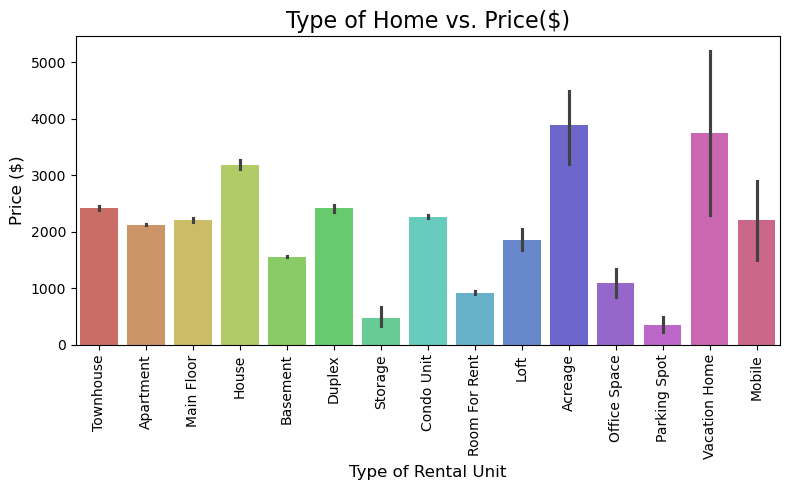

In [23]:
# Let's visualize the price vs. type of home
plt.figure(figsize=(8, 5))
sns.barplot(data=clean_rental_df, x='type', y='price', hue='type', palette='hls')
plt.xticks(rotation=90)
plt.ylabel('Price ($)', fontsize=12)
plt.xlabel('Type of Rental Unit', fontsize=12)
plt.title('Type of Home vs. Price($)', fontsize=16)
plt.tight_layout()
plt.show()

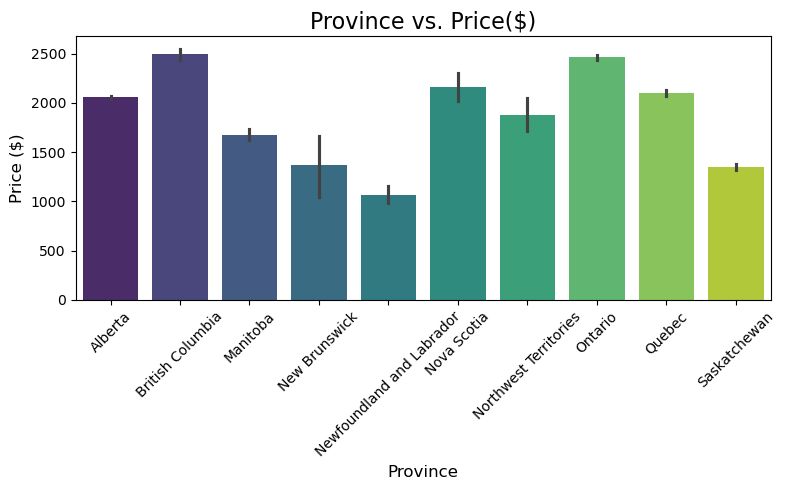

In [24]:
# Visualization of Price vs. Province
plt.figure(figsize=(8, 5))
sns.barplot(data=clean_rental_df, x='province', y='price', hue='province', palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Price ($)', fontsize =12)
plt.xlabel('Province', fontsize=12)
plt.title('Province vs. Price($)', fontsize=16)
plt.tight_layout()
plt.show()
# Ontario, Vancouver and Quebec contain the highest prices for rental units.
# Seeing as the 3 largest cities in Canada are in those provinces, this is expected.

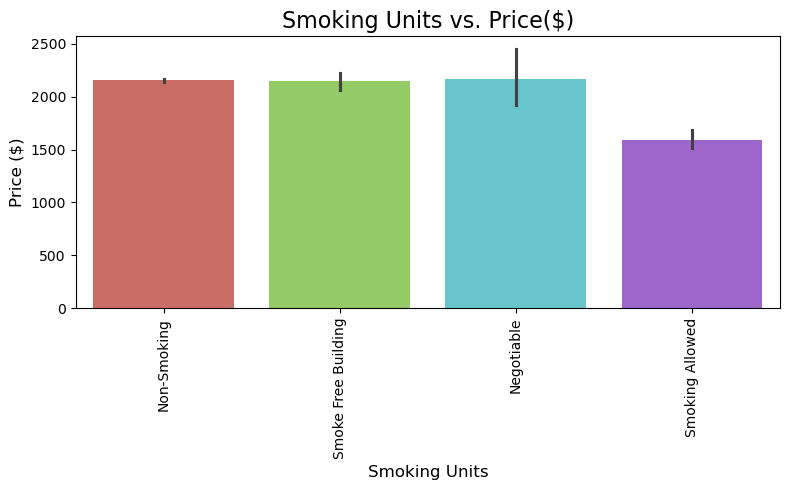

In [25]:
# Visualization of Price vs. Smoking
plt.figure(figsize=(8, 5))
sns.barplot(data=clean_rental_df, x='smoking', y='price', hue='smoking', palette='hls')
plt.xticks(rotation=90)
plt.ylabel('Price ($)', fontsize =12)
plt.xlabel('Smoking Units', fontsize=12)
plt.title('Smoking Units vs. Price($)', fontsize=16)
plt.tight_layout()
plt.show()
# As expected, non-smoking units are more expensive.

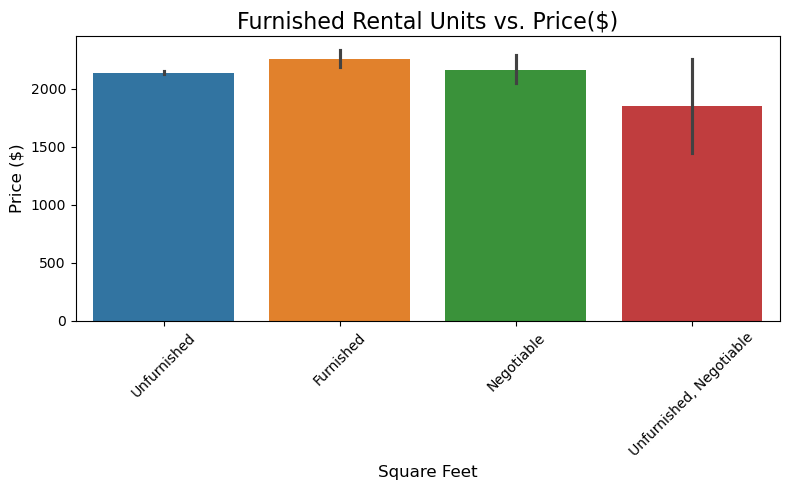

In [26]:
# Visualization of Price vs Furnished
plt.figure(figsize=(8, 5))
sns.barplot(data=clean_rental_df, x='furnishing', y='price', hue='furnishing')
plt.xticks(rotation=45)
plt.ylabel('Price ($)', fontsize =12)
plt.xlabel('Square Feet', fontsize=12)
plt.title('Furnished Rental Units vs. Price($)', fontsize=16)
plt.tight_layout()
plt.show()
# As expected, furnished units are typically more expensive.

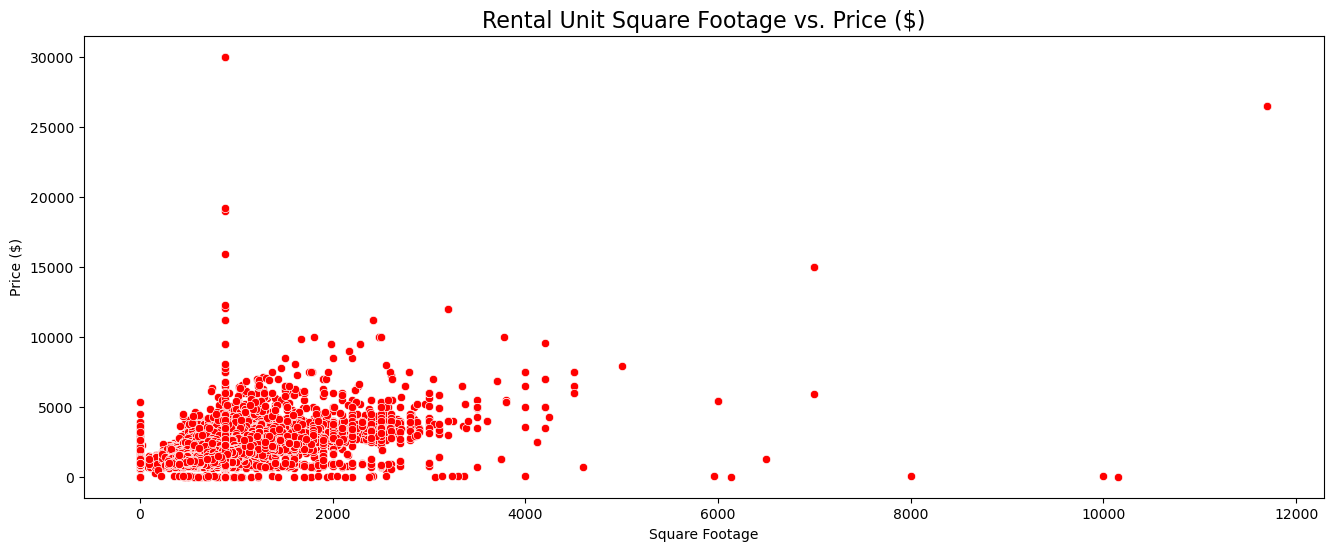

In [27]:
# Visualization of Square Footage vs. Price
plt.figure(figsize=(16, 6))
sns.scatterplot(data=clean_rental_df, x='sq_feet', y='price', color='red')
plt.title('Rental Unit Square Footage vs. Price ($)', fontsize=16)
plt.ylabel('Price ($)')
plt.xlabel('Square Footage')
plt.show()
# There are only a few outliers in this dataset. They may influence feature engineering later on.

## 4. Feature Engineering and Regression Modelling

In [29]:
# Encoding columns for modelling
from sklearn.preprocessing import OneHotEncoder
# Converting categorical columns into numerical
clean_rental_df.dtypes
# Creating an instance of OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False)
# Transforming objects into floats for regression modelling
encoded_cols = encoder.fit_transform(clean_rental_df[['city', 'province', 'type',
                                                      'beds', 'baths', 'furnishing', 'availability_date', 'smoking', 'cats', 'dogs']])
encoded_cols_clean_rental_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out([
    'city', 'province', 'type', 'beds', 'baths', 'furnishing', 'availability_date', 'smoking', 'cats', 'dogs']))
encoded_rental_df = clean_rental_df.drop(columns=['city', 'province', 'type', 'beds', 'baths', 'furnishing', 'availability_date', 
                                                  'smoking', 'cats', 'dogs']).join(encoded_cols_clean_rental_df)
encoded_rental_df['lease_term(months)'].unique() # lease_term(months) still has objects
encoded_rental_df['lease_term(months)'] = encoded_rental_df['lease_term(months)'].replace({'12 months': 12, '6 months': 6})
encoded_rental_df = encoded_rental_df.astype({'lease_term(months)': 'float64'})
encoded_rental_df.dtypes # All features are floats.

/var/folders/jk/x7s9xmyx44s3sx745m_03blc0000gn/T/ipykernel_52544/2383829816.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_rental_df['lease_term(months)'] = encoded_rental_df['lease_term(months)'].replace({'12 months': 12, '6 months': 6})


latitude                       float64
longitude                      float64
lease_term(months)             float64
price                          float64
sq_feet                        float64
                                ...   
smoking_Non-Smoking            float64
smoking_Smoke Free Building    float64
smoking_Smoking Allowed        float64
cats_True                      float64
dogs_True                      float64
Length: 461, dtype: object

In [30]:
# Preparing data for modelling using 'Price' as the target variable.
# Importing train_test_split
from sklearn.model_selection import train_test_split
# Searching for features with the highest correlation to target variable
encoded_rental_df.corr()
corr_encoded_rental_df = encoded_rental_df.corr()
# Obtaining columns with the highest correlation to 'price'
price_corr_df = corr_encoded_rental_df['price']
# Display top 10 columns
top_10_corr = price_corr_df.drop('price').sort_values(ascending=False).head(10)
print(top_10_corr)

sq_feet             0.425235
city_Toronto        0.240501
province_Ontario    0.187875
type_House          0.112143
longitude           0.109723
baths_2             0.107904
baths_7.5           0.104064
baths_3.5           0.092365
city_Vancouver      0.087279
beds_8 Beds         0.082284
Name: price, dtype: float64


In [31]:
# Removing NaNs
encoded_rental_df = pd.get_dummies(clean_rental_df, drop_first=False, dummy_na=False)

In [32]:
# Selecting features among the top correlations.
# Omitting baths_7.5 & beds_8
X = encoded_rental_df[['sq_feet', 'city_Toronto', 'province_Ontario', 'type_House', 'longitude', 'baths_2', 'city_Vancouver', 'baths_3.5']]
y = encoded_rental_df['price']
print('These are the features of the dataframe')
print(X)
print('This is the target variable')
print(y)

These are the features of the dataframe
       sq_feet  city_Toronto  province_Ontario  type_House   longitude  \
0       1403.0         False             False       False -114.012515   
1       1496.0         False             False       False -114.012515   
2       1180.0         False             False       False -114.012515   
3       1403.0         False             False       False -114.012515   
4       1403.0         False             False       False -114.012515   
...        ...           ...               ...         ...         ...   
25766    400.0         False             False       False -102.484782   
25767    810.0         False             False       False -102.484782   
25768    520.0         False             False       False -102.485765   
25769    400.0         False             False       False -102.485765   
25770    700.0         False             False       False -102.485765   

       baths_2  city_Vancouver  baths_3.5  
0        False           Fa

In [33]:
# Making sure there are no more NaN values
print(encoded_rental_df.isna().sum())
encoded_rental_df.dropna(inplace=True)

latitude                          0
longitude                         0
price                             0
sq_feet                           0
cats                              0
                                 ..
availability_date_September 30    0
smoking_Negotiable                0
smoking_Non-Smoking               0
smoking_Smoke Free Building       0
smoking_Smoking Allowed           0
Length: 472, dtype: int64


### 4.1 Regression Modelling

### *First Model*

In [36]:
# Linear Regression Model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
print('This is the X_train array')
print(X_train)
print('This is the X_test array')
print(X_test)
print('This is the y_train array')
print(y_train)
print('This is the y_test array')
print(y_test)

This is the X_train array
           sq_feet  city_Toronto  province_Ontario  type_House   longitude  \
22785  1100.000000         False             False       False  -73.494925   
557       0.000000         False             False       False -114.095311   
25169  1175.000000         False             False       False -104.511847   
8052   1000.000000         False             False       False -113.499000   
10369   720.000000         False             False       False -114.155872   
...            ...           ...               ...         ...         ...   
10963   885.636295         False             False       False -114.115793   
17301   918.000000         False              True       False  -73.606349   
5196    885.636295         False             False       False -114.512367   
12180   990.000000         False             False       False -114.140475   
235     800.000000         False             False       False -114.072088   

       baths_2  city_Vancouver  baths

In [37]:
# Importing StandardScaler
# Because there are a few far-reaching outliers, I have chosen to go with this method to minimize the impacts they could have.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit transform on the training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform on the testing data
X_test_scaled = scaler.transform(X_test)

print('This is the scaled X_train darray')
print(X_train_scaled.shape)
print('This is the scaled X_test array')
print(X_test_scaled.shape)

# Importing model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
X_train.shape # Output is (21895, 8)
y_train.shape # Output is (21895, )
# Initializing training model
lr_model.fit(X_train_scaled, y_train)

This is the scaled X_train darray
(21895, 8)
This is the scaled X_test array
(3864, 8)


LinearRegression()

In [61]:
# Importing to calculate validity of model
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
y_pred = lr_model.predict(X_test_scaled)
# Find Mean Absolute Error
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred)

print('This is the Mean Absolute Error')
print(mae_lr)
print('This is the Mean Squared Error')
print(mse_lr)
print('This is the RMSE')
print(rmse_lr)
print('This is the R2')
print(r2_lr)

This is the Mean Absolute Error
471.1261038714576
This is the Mean Squared Error
554258.7721807426
This is the RMSE
744.4855755357136
This is the R2
0.3869089217449678


### *Second Model*

In [65]:
# Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
# Transform X_train_scaled and X_test_scaled
X_train_poly = poly_transformer.fit_transform(X_train_scaled)
X_test_poly = poly_transformer.transform(X_test_scaled)

In [67]:
# Training the polynomial regression model
from sklearn.linear_model import LinearRegression
# Creating model
poly_model = LinearRegression()
# Fitting the training model with transformed features
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [69]:
# Calculate error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_poly = poly_model.predict(X_test_poly)  # Use X_test_poly, not X_test
# Metrics
poly_mae = mean_absolute_error(y_test, y_pred_poly)
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_rmse = np.sqrt(poly_mse)
poly_r2 = r2_score(y_test, y_pred_poly)
# Print results
print('This is the Mean Absolute Error:', poly_mae)
print('This is the Mean Squared Error:', poly_mse)
print('This is the RMSE:', poly_rmse)
print('This is the R2:', poly_r2)

This is the Mean Absolute Error: 453.84484455874747
This is the Mean Squared Error: 506005.2769543908
This is the RMSE: 711.3404789229915
This is the R2: 0.44028432850939314


### *Third Model*

In [72]:
# Using ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
# Initializing PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
# Fitting converter to features
X_train_poly = poly_transformer.fit_transform(X_train_scaled)
X_test_poly = poly_transformer.transform(X_test_scaled)

In [71]:
# Importing ElasticCV
from sklearn.linear_model import ElasticNetCV
# Creating ElasticCV model
elastic_model = ElasticNetCV(l1_ratio=[.1, .2, .5,.7, .90, .95, 1], eps=0.01, n_alphas=100, max_iter=15000)
elastic_model.fit(X_train_poly, y_train)
elastic_model

ElasticNetCV(eps=0.01, l1_ratio=[0.1, 0.2, 0.5, 0.7, 0.9, 0.95, 1],
             max_iter=15000)

In [73]:
# Searching for best Alpha
print(elastic_model.alpha_)

20.471417237113936


In [75]:
# Evaluating model
y_pred = elastic_model.predict(X_test_poly)

elastic_mae = mean_absolute_error(y_test, y_pred)
elastic_mse = mean_squared_error(y_test, y_pred)
elastic_rmse = np.sqrt(elastic_mse)
elastic_r2 = r2_score(y_test, y_pred)

print('This is the Elastic Mean Absolute Error:', elastic_mae)
print('This is the Elastic Mean Squared Error:', elastic_mse)
print('This is the Elastic RMSE:', elastic_rmse)
print('This is the Elastic R2:', elastic_r2)

This is the Elastic Mean Absolute Error: 456.4737870252101
This is the Elastic Mean Squared Error: 516613.2825939033
This is the Elastic RMSE: 718.7581530625606
This is the Elastic R2: 0.42855032637519985


## 5. Comparing the Models

In [77]:
metrics_comparison = {
    'Models': ['Linear Regression (LR)', 'Polynomial Regression (PR)', 'Poly. Reg. with ElasticNetCV'],
    'MAE': [mae_lr, poly_mae, elastic_mae],
    'MSE': [mse_lr, poly_mse, elastic_mse],
    'RMSE': [rmse_lr, poly_rmse, elastic_rmse],
    'R²': [r2_lr, poly_r2, elastic_r2]}
metrics_comparison_df = pd.DataFrame(metrics_comparison)
metrics_comparison_df

,Models,MAE,MSE,RMSE,R²
0,Linear Regression (LR),471.126104,554258.772181,744.485576,0.386909
1,Polynomial Regression (PR),453.844845,506005.276954,711.340479,0.440284
2,Poly. Reg. with ElasticNetCV,456.473787,516613.282594,718.758153,0.428550


#### *Because Polynomial Regression (PR) has the lest amount of error and the highest r2 score, I will be choosing this for my final prediction model*

# 6. Final Model Predictions

In [87]:
clean_rental_df.iloc[20000]

city                              Toronto
province                          Ontario
latitude                        43.657961
longitude                      -79.451842
lease_term(months)                     12
type                            Apartment
price                              2680.0
beds                                1 Bed
baths                                   1
sq_feet                             568.0
furnishing                    Unfurnished
availability_date               Immediate
smoking               Smoke Free Building
cats                                 True
dogs                                 True
Name: 20012, dtype: object

In [95]:
# Using the above information as my data point
pred_data = {
    'sq_feet': 568,
    'city_Toronto': 1,
    'province_Ontario': 1,
    'type_House': 0,
    'longitude': -79.451842,
    'baths_2': 0,
    'city_Vancouver': 0,
    'baths_3.5': 0
}

# Making a df of this point just for the prediction.
pred_df = pd.DataFrame([pred_data])
print(pred_df)

   sq_feet  city_Toronto  province_Ontario  type_House  longitude  baths_2  \
0      568             1                 1           0 -79.451842        0   

   city_Vancouver  baths_3.5  
0               0          0  


In [99]:
# Scaling for training
pred_scaled = scaler.transform(pred_df) 
# Applying polynomial feature transformation
pred_poly = poly_transformer.transform(pred_scaled)

In [101]:
# Prediction
predicted_price = poly_model.predict(pred_poly)
print(f"Predicted Price for data point 20000: {predicted_price[0]:.2f}")

Predicted Price for data point 20000: 2288.55
